<a href="https://colab.research.google.com/github/dilakuyucu7/DSA210-Fall24-Flashcards-Project/blob/main/hypothesis_test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#my second hypothesis is:
#Null Hypothesis: There is no correlation between the date added and accuracy level.
#Alternative Hypothesis: Earlier cards have a higher accuracy level than recently added cards.

In [ ]:
#I used Spearman correlation for this data
#Spearmen coefficient indicates a weak negative correlation between the date a flashcard was added and the accuracy level.
#This suggests that newer flashcards tend to have slightly higher accuracy compared to older ones.

#The p-value is extremely low, much smaller than the typical significance level of 0.05.
#Therefore, reject the null hypothesis —
#there is a statistically significant correlation between the date added and accuracy.

<ipython-input-1-4b16fb07e518>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Card_was_added'] = pd.to_datetime(combined_df['Card_was_added'], errors='coerce')


Spearman's Correlation Coefficient: -0.1703
P-value: 0.0000
✅ Reject the null hypothesis: Significant correlation exists between date added and accuracy.


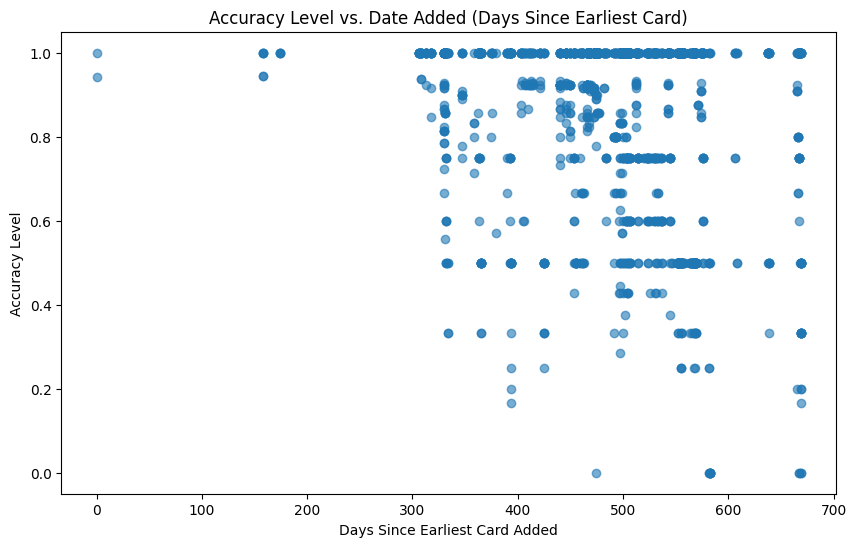

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Load datasets
korean_df = pd.read_csv('/content/kr_progress_with_pos_stanza.csv')
german_df = pd.read_csv('/content/deu_progress_with_pos_stanza.csv')
italian_df = pd.read_csv('/content/ita_progress_with_pos_stanza.csv')

# Standardize column names and remove extra spaces
def clean_columns(df):
    df.columns = df.columns.str.strip().str.replace(' ', '_')
    return df

korean_df = clean_columns(korean_df)
german_df = clean_columns(german_df)
italian_df = clean_columns(italian_df)

# Convert 'DET' to 'NOUN' for German dataset
german_df['Part_of_Speech'] = german_df['Part_of_Speech'].replace({'DET': 'NOUN'})

# Combine datasets into a single DataFrame
combined_df = pd.concat([korean_df, german_df, italian_df], ignore_index=True)

# Convert 'Card was added' to datetime and standardize
combined_df['Card_was_added'] = pd.to_datetime(combined_df['Card_was_added'], errors='coerce')

# Convert 'Correct_answers' and 'Studied' to numeric
combined_df['Correct_answers'] = pd.to_numeric(combined_df['Correct_answers'], errors='coerce')
combined_df['Studied'] = pd.to_numeric(combined_df['Studied'], errors='coerce')

# Filter out invalid rows
combined_df = combined_df[(combined_df['Studied'] > 0) & (combined_df['Correct_answers'].notna())].copy()

# Calculate accuracy level
combined_df['accuracy_level'] = combined_df['Correct_answers'] / combined_df['Studied']

# Convert the date into numeric values (days since the earliest card)
combined_df['days_since_earliest'] = (combined_df['Card_was_added'] - combined_df['Card_was_added'].min()).dt.days

# Perform Spearman's Rank Correlation test
corr_coefficient, p_value = stats.spearmanr(combined_df['days_since_earliest'], combined_df['accuracy_level'])

# Display the correlation results
print(f"Spearman's Correlation Coefficient: {corr_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("✅ Reject the null hypothesis: Significant correlation exists between date added and accuracy.")
else:
    print("❌ Fail to reject the null hypothesis: No significant correlation found.")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['days_since_earliest'], combined_df['accuracy_level'], alpha=0.6)
plt.title('Accuracy Level vs. Date Added (Days Since Earliest Card)')
plt.xlabel('Days Since Earliest Card Added')
plt.ylabel('Accuracy Level')
plt.show()
